# 001 - Preprocessing and Feature Engineering

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

### Load training and test data

In [2]:
train_df = pd.read_csv("../assets/data/jigsaw_data/train.csv.zip")
test_df = pd.read_csv("../assets/data/jigsaw_data/test.csv.zip")

In [3]:
### Add Neutral Column
toxicity_classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df["neutral"] = 1 - train_df[toxicity_classes].max(axis=1)
toxicity_classes.append("neutral")

### Feature Engineering

In [4]:
train_df["char_count"] = train_df["comment_text"].apply(len)
# --Verify
# train_df.tail(20)
# len(train_df.iloc[159556]['comment_text'])

In [5]:
train_df["word_count"] = train_df["comment_text"].apply(lambda x: len(x.split()))
# --Verify
# len((train_df.iloc[159556]['comment_text']).split())
# train_df.iloc[159556]['comment_text']

In [6]:
train_df["word_v_char_count"] = train_df["word_count"] / train_df["char_count"]

In [7]:
train_df["word_v_char_count"].describe()

count    159571.000000
mean          0.174656
std           0.024610
min           0.000604
25%           0.163265
50%           0.175000
75%           0.187500
max           0.521739
Name: word_v_char_count, dtype: float64

In [8]:
train_df["capitals"] = train_df["comment_text"].apply(lambda x: sum(1 for c in x if c.isupper()))

In [9]:
train_df["upper_case_word"] = train_df["comment_text"].apply(lambda x:sum(map(str.isupper, x.split())))

In [10]:
train_df["upper_case_word_v_word_count"] = train_df["upper_case_word"] / train_df["word_count"]
train_df["upper_case_word_v_char_count"] = train_df["upper_case_word"] / train_df["char_count"]

In [11]:
train_df['exclamation_marks'] = train_df["comment_text"].apply(lambda x: x.count('!'))
train_df['exclamation_marks_v_char_count'] = train_df['exclamation_marks'] / train_df['char_count']
train_df['exclamation_marks_v_word_count'] = train_df['exclamation_marks'] / train_df['word_count']

In [12]:
train_df['unique_word_count'] = train_df["comment_text"].apply(lambda x: len(set(w for w in x.split())))
train_df['unique_word_count_v_char_count'] = train_df['unique_word_count'] / train_df['char_count']
train_df['unique_word_count_v_word_count'] = train_df['unique_word_count'] / train_df['word_count']

In [13]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,char_count,...,capitals,upper_case_word,upper_case_word_v_word_count,upper_case_word_v_char_count,exclamation_marks,exclamation_marks_v_char_count,exclamation_marks_v_word_count,unique_word_count,unique_word_count_v_char_count,unique_word_count_v_word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,...,17,2,0.046512,0.007576,0,0.000000,0.000000,41,0.155303,0.953488
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,...,8,1,0.058824,0.008929,1,0.008929,0.058824,17,0.151786,1.000000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,...,4,0,0.000000,0.000000,0,0.000000,0.000000,39,0.167382,0.928571
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,...,11,5,0.044248,0.008039,0,0.000000,0.000000,82,0.131833,0.725664
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,...,2,0,0.000000,0.000000,0,0.000000,0.000000,13,0.194030,1.000000


In [14]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'neutral', 'char_count', 'word_count',
       'word_v_char_count', 'capitals', 'upper_case_word',
       'upper_case_word_v_word_count', 'upper_case_word_v_char_count',
       'exclamation_marks', 'exclamation_marks_v_char_count',
       'exclamation_marks_v_word_count', 'unique_word_count',
       'unique_word_count_v_char_count', 'unique_word_count_v_word_count'],
      dtype='object')

In [15]:
features = ['char_count', 'word_count','word_v_char_count', 'capitals', 
            'upper_case_word','upper_case_word_v_word_count', 'upper_case_word_v_char_count',
            'exclamation_marks', 'exclamation_marks_v_char_count',
            'exclamation_marks_v_word_count', 'unique_word_count',
            'unique_word_count_v_char_count', 'unique_word_count_v_word_count']

In [16]:
train_correlation_df = pd.DataFrame([{col:train_df[feature].corr(train_df[col]) for col in toxicity_classes} for feature in features],
                                    index = features)
train_correlation_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral
char_count,-0.054470,0.010131,-0.042945,-0.008011,-0.045052,-0.013647,0.051696
word_count,-0.052444,0.008452,-0.042207,-0.006688,-0.043642,-0.014493,0.049350
word_v_char_count,0.100025,0.036302,0.085401,0.037409,0.074877,0.027936,-0.101415
capitals,0.091175,0.143410,0.081691,0.033581,0.075945,0.053576,-0.089996
upper_case_word,0.094123,0.145556,0.079580,0.039755,0.075260,0.046290,-0.092031
upper_case_word_v_word_count,0.224334,0.171809,0.185472,0.061234,0.167980,0.088943,-0.218988
upper_case_word_v_char_count,0.225044,0.168672,0.186195,0.064645,0.168478,0.086362,-0.220079
exclamation_marks,0.037337,0.060578,0.024362,0.034202,0.027010,0.006005,-0.036516
exclamation_marks_v_char_count,0.132071,0.093136,0.108243,0.037812,0.102697,0.039349,-0.129425
exclamation_marks_v_word_count,0.019629,0.013221,0.008884,0.004981,0.009791,0.002187,-0.019060


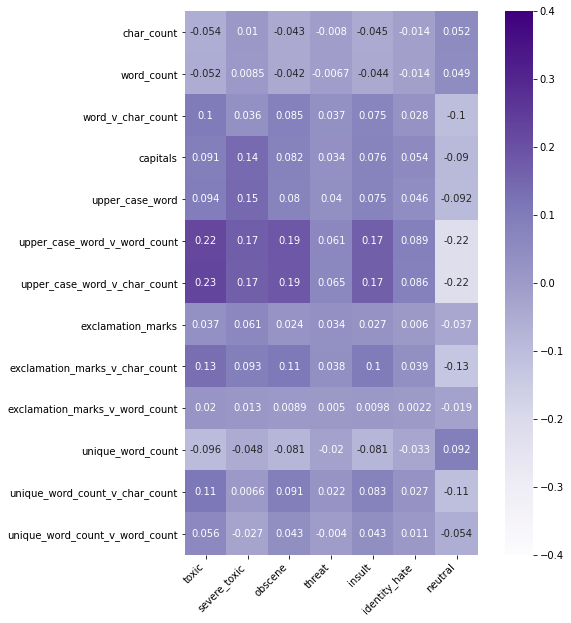

In [17]:
colormap = plt.cm.Purples
plt.figure(figsize=(10,10))
g = sns.heatmap(train_correlation_df,
            linewidths=0.1,
            linecolor= None,
            vmin = -0.4,
            vmax = 0.4,
            square=True,
            annot=True,
            cmap=colormap,
#             xticklabels=toxic_class_labels, 
#             yticklabels=toxic_class_labels
           );
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right');

> 
- High correlation between Upper Case word (normalized with word count and character count) usage with toxicity   classes
- High correlation between Exclamation marks (normalized with character count) usage with toxicity classes
- Unique word count is also fairly high toxic class

### Clean Comment

#### Text cleaning employed:
* remove url and emails
* remove html/XML tags
* expand contraction

In [26]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", ' ', text)
    text = re.sub("\s+", ' ', text)
    text = re.sub(r"\S*@\S*\s?", "", text)            # remove emails
    text = re.sub(r"\s+", " ", text)                  # remove new line characeters
    text = re.sub(r"\'", "", text)                    # remve single qutoes
    text = re.sub(r"^https?:\/\/.*[\r\n]*", '', text) # remove url
    
#     https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string#12982689
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')   # remove HTML tags
    text = re.sub(cleanr, '', text)
    
    text = text.strip(' ')
    return text

In [27]:
train_df["cleaned_comment_text"] = train_df["comment_text"].map(lambda text: clean_text(text))

In [31]:
test_df["cleaned_comment_text"] = test_df["comment_text"].map(lambda text: clean_text(text))

In [28]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,char_count,...,upper_case_word,upper_case_word_v_word_count,upper_case_word_v_char_count,exclamation_marks,exclamation_marks_v_char_count,exclamation_marks_v_word_count,unique_word_count,unique_word_count_v_char_count,unique_word_count_v_word_count,cleaned_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,...,2,0.046512,0.007576,0,0.000000,0.000000,41,0.155303,0.953488,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,...,1,0.058824,0.008929,1,0.008929,0.058824,17,0.151786,1.000000,d aww he matches this background colour i am s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,...,0,0.000000,0.000000,0,0.000000,0.000000,39,0.167382,0.928571,hey man i am really not trying to edit war it ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,...,5,0.044248,0.008039,0,0.000000,0.000000,82,0.131833,0.725664,more i cannot make any real suggestions on imp...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,...,0,0.000000,0.000000,0,0.000000,0.000000,13,0.194030,1.000000,you sir are my hero any chance you remember wh...


In [32]:
test_df.head()

,id,comment_text,cleaned_comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you wi...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i do not anonymously edit articles at all


### Export cleaned train and test dataframe 
* contains cleaned comment text column and other feature engineered columns

In [35]:
output_dir = "../assets/data/jigsaw_data/"
train_df.to_csv(output_dir + "clean_train.csv", index=False)
test_df.to_csv(output_dir + "clean_test.csv", index=False)